In [7]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from hydra import initialize, compose
from lenstronomy.Plots import plot_util
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import overplot, plot
from mejiro.lenses import test
from mejiro.helpers import pyhalo, lenstronomy_sim, pandeia_input

In [8]:
lens = test.TutorialLens()
model = lens.get_array(num_pix=45, side=4.95)

In [9]:
noise_list = []

for i in range(10):
    noise_list.append(pandeia_input.get_background_noise(45, 'f184'))

In [10]:
last_array = noise_list[-1]

for i, array in enumerate(noise_list):
    print(np.count_nonzero(last_array - array))

2025
2025
2024
2024
2024
2024
2025
2024
2025
0


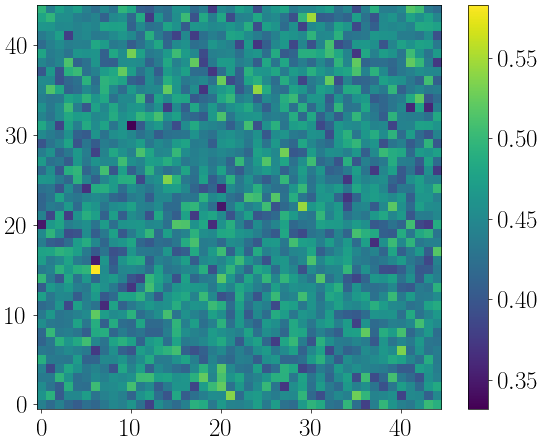

In [11]:
plot.plot(np.abs(noise_list[0]), colorbar=True)

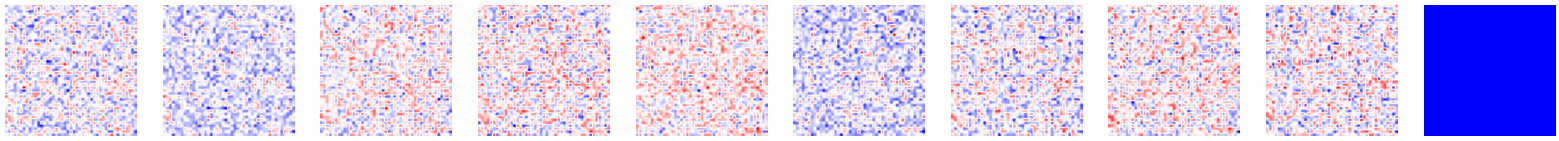

In [12]:
f, ax = plt.subplots(1, len(noise_list), figsize=(20,20))

for i, array in enumerate(noise_list):
    axis = ax[i].imshow(last_array - array, cmap='bwr')  # , norm=norm
    ax[i].set_axis_off()

plt.show()